## 3.  Cadenas de Markov

>a) Escriba una función que cargue los datos, los divida en conjuntos de entrenamiento y de pruebas. En base a como trabajan las cadenas de markov ¿Es necesario escalar los datos?

In [2]:
import pandas as pd
name_f = "international-airline-passengers.csv"
dataframe = pd.read_csv(name_f,sep=',',usecols=[1],engine='python',skipfooter = 3)
dataframe[:] = dataframe[:].astype('float32')
X_train, X_test = dataframe[:96].values, dataframe[96:].values


Para las HMM el escale solo tiene un objetivo computacional.

>b) Para resolver el problema defina un modelo de cadena de markov de primer orden con estados ocultos (*hidden markov model*) simple con un generador de datos osbervados que e distribuye normal $p(x_t|s_t)=\mathcal{N}(\mu_{s},\sigma_{s})$. Para evaluar mida la log-verosimilitud (*log-likelihood*) del modelo sobre el conjunto de entrenamiento y de pruebas. Comente

In [5]:
from hmmlearn import hmm
import numpy as np
np.random.seed(30)
n_state = 3
markov_model = hmm.GaussianHMM(n_components=n_state, n_iter=100)
markov_model.fit(X_train)

-473.08553322588466
-462.6928527979605


C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecat

In [6]:

print(markov_model.score(X_train))
print(markov_model.score(X_test))

-473.08553322588466
-462.6928527979605


C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Un proceso de markov esta caracterizado por una serie de estados y que la probabilidad de moverse de un estado a otro temporalmente solo depende del estado actual. Las HMM intentan encontrar los valores de las probabilidades.

El score del modelo es un logaritmo, como este es negativo significa que el error es extremadamente pequeño, esto implica que el uso de una HMM es una buena tecnica para datos en secuencia. 

> c) Analice cualitativamente lo que aprendió el modelo a través de las distribuciones de probabilidad de las observaciones para un estado oculto dado, esto es, $p(x_t|s_t)$, y las distribuciones de probabilidad de transición $p(s_{t+1}|s_t)$. Comente.

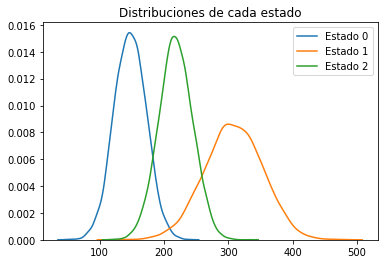

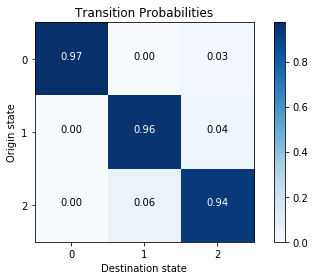

In [8]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

import itertools
for i in range(n_state):
    r = norm(markov_model.means_[i], np.sqrt( markov_model.covars_[i,0])).rvs(10000)
    sns.distplot(r,kde=True, hist=False,label="Estado "+str(i))
plt.legend()
plt.title("Distribuciones de cada estado")
plt.show()
def plot_state_matrix(cm, states,title='Transition Probabilities',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(states))
    plt.xticks(tick_marks, states)
    plt.yticks(tick_marks, states)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
    plt.ylabel('Origin state')
    plt.xlabel('Destination state')
    plt.tight_layout()
plot_state_matrix(markov_model.transmat_,np.arange(n_state))

>d) Gracias a que el modelo no predice un valor único, sino que una distribucipon de probabilidad (incerteza en cada valor continuo), realice un gráfico de ésto, es decir, visualice el intervalo de confianza en que el modelo predice en cada instante de tiempo, dado el estado oculto, y contrarréstelo con la secuencia original. Hágalo para el conjunto de entrenamiento y de pruebas

C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


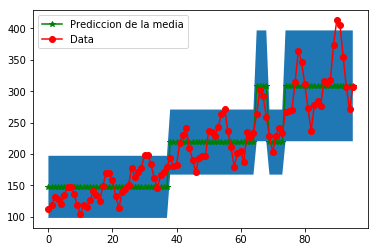

In [19]:
X_state = markov_model.predict(X_train) #predice el estado, no el valor
plt.fill_between(np.arange(X_train.shape[0]),markov_model.means_[X_state][:,0]-1.96*np.sqrt(markov_model.covars_[X_state])[:,0,0], markov_model.means_[X_state][:,0]+1.96*np.sqrt(markov_model.covars_[X_state])[:,0,0])
plt.plot(markov_model.means_[X_state][:,0],'g*-',label="Prediccion de la media")
plt.plot(X_train,'ro-',label="Data") #-- here put train or val
plt.legend()
plt.show()

C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


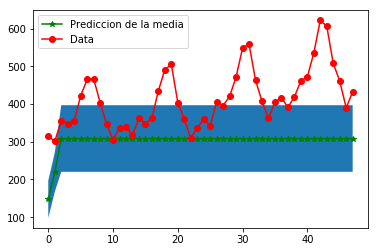

In [15]:
X_state = markov_model.predict(X_test) #predice el estado, no el valor
plt.fill_between(np.arange(X_test.shape[0]),markov_model.means_[X_state][:,0]-1.96*np.sqrt(markov_model.covars_[X_state])[:,0,0], markov_model.means_[X_state][:,0]+1.96*np.sqrt(markov_model.covars_[X_state])[:,0,0])
plt.plot(markov_model.means_[X_state][:,0],'g*-',label="Prediccion de la media")
plt.plot(X_test,'ro-',label="Data") #-- here put train or val
plt.legend()
plt.show()

Se observa que para el conjunto de validacion los resultados son insatisfactorios, estos se escapan del intervalo de confianza de 1.96 veces la desviacion estandar. Este intervalo es el percentil 97.5 de la distribucion normal.

>e) Dado que se ve que el problema no puede ser modelado de manera adecuada con 3 estados distintos (valores que puede tomar el estado oculto en cada instante de tiempo, stst). Experimente con variar la cantidad de éstos ¿Qué sucede si aumenta hasta tener la misma cantidad de estados que la cantidad de datos? Visualice lo que estime conveniente, además de medir el log-likelihood en cada conjunto.

In [16]:
n_states = np.arange(1,50)
markov_model = hmm.GaussianHMM(n_components=n_state, n_iter=100)
markov_model.fit(X_train)

C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecat

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

>f) Debido a que el modelo no predice el valor continuo directamente, sino que predice el estado oculto de cada instante de tiempo, es necesario hacer un muestreo para obtener el valor continuo (o si desea, quedarse con la media). Realice este muestreo y evalúe la métrica de MSE (Mean Square Error) sobre el conjunto de pruebas.

In [17]:
X_state = markov_model.predict(X_test) #predice el estado, no el valor
X_output = norm( markov_model.means_[X_state], np.sqrt(markov_model.covars_[X_state][:,0]) ).rvs() #rvs is sample
from  sklearn.metrics import mean_squared_error as mse
mse(X_test, X_output)

C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


20027.577691081242

>¿Cambian mucho los resultados si se emplea una mezcla de gausianas como modelo para p(xt|st)p(xt|st) en ves de que cada estado pertenezca a un único modelo Gausiano (distribución normal)?

In [18]:
from hmmlearn.hmm import GMMHMM
markov_model2 = GMMHMM(n_components=n_state, n_mix=3, n_iter=100)

C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
